# Machine learning Coursera Exercise 2 - Logistic Regression

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc 

In [266]:
data1 = pd.read_csv('ex2data1.txt',index_col=False,header=None,names=['Test1','Test2','Admissions'])
data1.head()
X = np.c_[np.ones(len(data1)),np.array(data1.drop('Admissions',axis=1))]
y = np.c_[data1.iloc[:,2].as_matrix()]

## Visualizing the data

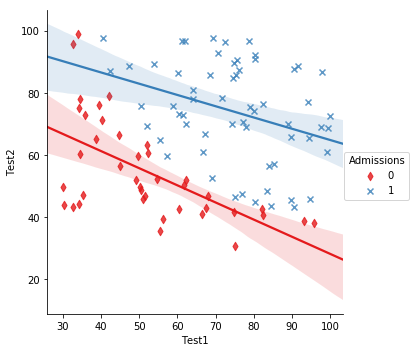

In [4]:
#plt.scatter(data1['Test1'],data1['Test2'],marker=['D,c=data1['Admissions'])
sns.lmplot( x="Test1", y="Test2", data=data1,hue='Admissions'
           ,markers=["d", "x"],palette="Set1",fit_reg=True)
#plt.legend(['Admitted'],'Not admitted'])
#plt.xlabel('Exam 1 Score')
#plt.ylabel('Exam 2 Score')
plt.show()

## Sigmoid function

In [5]:
def sigmoid(z):
    #SIGMOID Compute sigmoid function
    g = 1/(1+np.exp(-z))
    return g

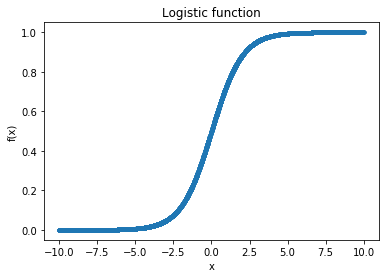

In [177]:
rand_array= np.random.uniform(low=-10, high=10, size=(10000,))
randsig = sigmoid(rand_array)
plt.plot(rand_array,randsig,marker='.',linestyle = 'None')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Logistic function')
plt.show()



## Cost function and gradient

$$ J(\theta)=\frac{1}{m}  \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] $$

In [381]:
def costFunction(theta, X, y):
    #COSTFUNCTION Compute cost and gradient for logistic regression
    #J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    #parameter for logistic regression and the gradient of the cost
    #w.r.t. to the parameters.
    
    # Initialize
    m = np.size(y,axis=0)
    J = 0
    
    #Computations 
    h =sigmoid(X.dot(theta.T)).reshape(-1,1)
    J = (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h)) ) * 1/m
    grad =X.T.dot(h-y)*(1/m)
    return J,grad.flatten()
    
    

Exercise use Matlab\Octab fminfunc function for optimization of the cost function , here i use python's scipy optimization suite for the Implementation. The function optimize.minimize takes the the cost funcion  as a callable  with its jacobian. jac='True' if cost function returns both the cost and the gradient 

In [382]:
innit_theta = np.zeros(shape=(1,X.shape[1]))
J,grad = costFunction(innit_theta,X,y)

print('Cost at initial theta (zeros): %s \n' %(J))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(' %s \n' %(grad))
print('Expected gradients (approx):\n -0.1000,-12.0092, -11.2628')


Cost at initial theta (zeros): [[ 0.69314718]] 

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

 [ -0.1        -12.00921659 -11.26284221] 

Expected gradients (approx):
 -0.1000,-12.0092, -11.2628


## Optimization using scipy.optimize.minimize

In [404]:
OptimizeResult = sc.optimize.minimize(costFunction, innit_theta, args=(X,y), method=None, jac=True)

D:\Users\Uri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [405]:
print('Cost at theta found by scipy.optimize.minimize:   %s \n' %(OptimizeResult.fun))
print('Expected cost (approx): 0.203\n')
print('theta:  %s \n' %(OptimizeResult.x))
print('Expected theta (approx):\n')
print('theta:  -25.161 0.206  0.201 ')


Cost at theta found by scipy.optimize.minimize:   0.2034977015894438 

Expected cost (approx): 0.203

theta:  [-25.16133284   0.2062317    0.2014716 ] 

Expected theta (approx):

theta:  -25.161 0.206  0.201 


## Prediction

100

In [431]:
def predict(theta,X,threshold):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic 
    #regression parameters theta
    #p = PREDICT(theta, X) computes the predictions for X using a 
    #threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    m = X.shape[0]
    p = sigmoid(theta.T.dot(X))
    y = int(p >= threshold)
    #Predict return probability (p) for admission  and the label [1=admission ,0 = no admission ]
    return p,y
   

In [432]:
treshold = 0.5
test_x = np.array([1,45,85])
predict(OptimizeResult.x,test_x,treshold)

(0.77629072405889465, 1)